In [23]:
import pandas as pd
df = pd.read_csv("C:\\Users\\rbhatia\\Documents\\GreatLearning\\Datasets\\resume_data.csv")
df.head(100)

,ID,Category,Resume
0,1,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."
5,6,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
6,7,HR,b'Resume of Satheesh\n\nwww.downlo\nSatheesh\n...
7,8,HR,"b""GM HR & ADMINISTRATION Resume Sample www.tim..."
8,9,HR,"b""www.uaehrzone.com\n\nRobert Wales\nDubai\nUn..."
9,10,HR,"b""Human Resources Coordinator Resume\nExample\..."


In [33]:
from io import StringIO
col = ['Category', 'Resume']
df = df[col]
df = df[pd.notnull(df['Resume'])]
df.columns = ['Category', 'Resume']
df['category_id'] = df['Category'].factorize()[0]
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)
df

,Category,Resume,category_id
0,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box...",0
1,HR,b'Name Surname\nAddress\nMobile No/Email\nPERS...,0
2,HR,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...,0
3,HR,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...,0
4,HR,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert...",0
5,HR,"b'John H. Smith, P.H.R.\n800-991-5187 | PO Box...",0
6,HR,b'Resume of Satheesh\n\nwww.downlo\nSatheesh\n...,0
7,HR,"b""GM HR & ADMINISTRATION Resume Sample www.tim...",0
8,HR,"b""www.uaehrzone.com\n\nRobert Wales\nDubai\nUn...",0
9,HR,"b""Human Resources Coordinator Resume\nExample\...",0


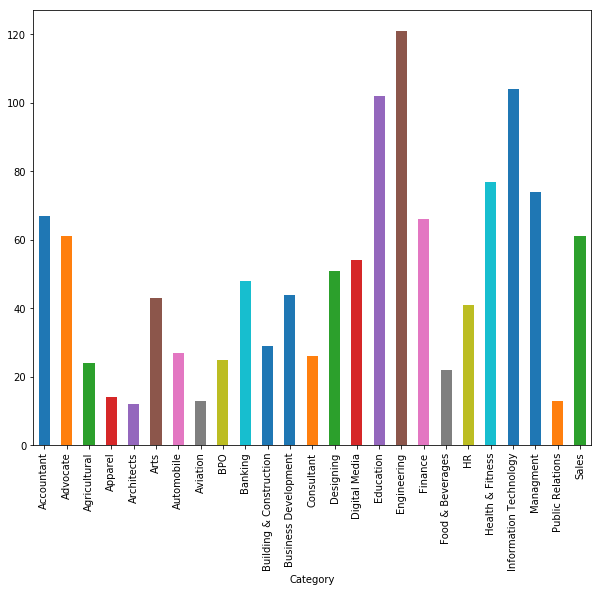

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
df.groupby('Category').Resume.count().plot.bar(ylim=0)
plt.show()

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Resume).toarray()
labels = df.category_id
features.shape

(1219, 27968)

In [34]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Category))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Accountant':
  . Most correlated unigrams:
. chartered
. accountant
  . Most correlated bigrams:
. x82 xa0
. accountant resume
# 'Advocate':
  . Most correlated unigrams:
. legal
. law
  . Most correlated bigrams:
. law school
. school law
# 'Agricultural':
  . Most correlated unigrams:
. plants
. horticulture
  . Most correlated bigrams:
. npart american
. 5890 nj
# 'Apparel':
  . Most correlated unigrams:
. nfashion
. fashion
  . Most correlated bigrams:
. interior design
. space planning
# 'Architects':
  . Most correlated unigrams:
. tower
. drawings
  . Most correlated bigrams:
. cad xef
. auto cad
# 'Arts':
  . Most correlated unigrams:
. artist
. theatre
  . Most correlated bigrams:
. art institute
. nheight xe2
# 'Automobile':
  . Most correlated unigrams:
. automobile
. automotive
  . Most correlated bigrams:
. nphone 586
. michigan nphone
# 'Aviation':
  . Most correlated unigrams:
. attendant
. flight
  . Most correlated bigrams:
. nflight attendant
. flight attendant
# '

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['Resume'], df['Category'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [28]:
software_engineer = '''﻿Irshad Ali
Email Address: irshadali18@gmail.com,irshadali@outlook.com 
Cell: 0321-7588568

Objective
I am looking forward to join a progressive organization. I am Strong team builder and leader. I have high level of personal morals and integrity. I am Goal oriented, self-motivated and committed to the successful outcome of the project. I am willing to work hard and have a great desire to learn.
Summary
    • Since March 2007, have 6 years plus of extensive hands on experience of website development.
    • An experienced team lead and team player with excellent communication and interpersonal skills who has the ability to work independently under pressure.
    • Currently working as Senior Software Engineer/Team Lead at Hashe Computer Solutions.
    • Masters in 2007 from the University College of Information Technology, Lahore, Pakistan.
Skills
Languages/Web Development
PHP, C# .Net, JavaScript, HTML, CSS, Java, XML, SQL
Frameworks
AJAX, Zend, Symfony2,  CodeIgniter
Open Source
Wordpress, Joomla, XCart, CSCart
Databases
MySQL, Oracle
Tools
Netbeans, Dreamweaver, SqlYog, NavicoSoft, MicroOlap


Experience
Hashe Computer Solution, Lahore, Pakistan 
Senior Software Engineer / Team Lead
(March 2008 – To date)
Responsibilities include team management, direct client communication and software development.
Mechtechnologies, Lahore, Pakistan 
Software Engineer
(March 2007 – February 2008)

Projects
Freight Ordering System – Hashe Computer Solutions
Role:
    • Development Lead
Tools:
    • PHP, MySQL, Ajax, JQuery , Web Services
Details:
    • This is a web based system, which provides an online competitive freight quotes within zip code range from best courier & transport companies of the region with favorable discounts and transit days. Later shipment can be booked out of these quotes and tracked though website. Companies can add / manage their locations, product catalog for swift use of the system.
    • This application works with SMC3 to acquire shipment rates for given locations and then apply different accessorial and fuel charges added by admin to calculate final shipment rates.
    • Using the back office application, admin can set different accessorial, discounts, fuel charges, and FAK classes for each company and carrier. Manage the Sales Representatives & this commission for different companies & Carriers.
    • Comprehensive report system provides reports about the shipment, carrier, customer, sale representative commission and billing reports. 
    • Complete Accounting System.

http://www.freightanywhere.com
http://www.tech-logistics.com

Online Golf Course Booking System – Hashe Computer Solutions
Role:
    • Application Developer
Tools:
    • PHP, MySQL, Ajax, JQuery, Web Services
Details:
    • This is a web based system, which provides golfers an easy way to use website to search, compare, and book golf tee times for free. With numerous golf courses available for play in most areas.

http://www.back9booking.com

Ecommerce Shopping System – Hashe Computer Solutions
Role:
    • Application Developer/Team Lead
Tools:
    • PHP, MySQL, JQuery, Zend
Details:
Complete ecommerce shopping system with following features
    • Administration system to easily update all product details, prices, pictures, stock details and other information online.
    • Manage Customer Accounts
    • Manage Wish list
    • Customer Reviews & Rating
    • Manage categories and products
    • Manage Product options and related products
    • Advanced pricing algorithms
    • Order and Invoice history
    • Take payments online using PayPal
    • Shopping cart system to allow easy purchase of products
    • Automatic email notification of orders
    • Full checkout procedure
    • Fast and friendly quick search and advanced search features
    • Reports of site visits, pages viewed, most viewed products, most ordered products and most viewed categories
http://www.tcig.co.uk

Free Home Listing – Hashe Computer Solutions
Role:
    • Application Developer
Tools:
    • PHP, MySQL, JQuery, Codeigniter
Details:
This is a property portal with three access level
    • Customer Login
        ◦ Search Properties by State And City, Key words and Zip Code with option in different miles radius i.e. search all properties having zip code 03055 and within 10 miles radius around it.  
        ◦ Register as Customer
        ◦ Manage their Listings
        ◦ Add/Edit property
        ◦ Add/Edit/Delete Properties Images
        ◦ Delete Properties
    • Agent Login
        ◦ Add/Edit property
        ◦ Add/Edit/Delete Properties Images
        ◦ Delete Properties
    • Admin login
        ◦ Manage Customers (Add/Edit/Delete/Active/Inactive)
        ◦ Manage Customer Packages
        ◦ Manage Agents (Add/Edit/Delete/Active/Inactive)
        ◦ Manage Listings (Add/Edit/Delete/Active/Inactive)
http://demo.hashe.com/freehomelistings/

Rockingham Acres – Hashe Computer Solutions
Role:
    • Application Developer
Tools:
    • PHP, MySQL, JQuery
Details:
This is an Online Flower Store has
    • Online Shopping Cart
    • Word Press Blog
http://www.rockinghamacres.com/


Third Coast Collection – Hashe Computer Solutions
Role:
    • Application Developer
Tools:
    • PHP, MySQL, JQuery
Details:
This website has
    • Online Shopping Cart
    • Authorized .Net Payment Integration
    • Word Press Blog
http://www.thirdcoastcollection.com/

PPA-Office Management System – Hashe Computer Solutions
Role:
    • Application Developer
Tools:
    • PHP, MySQL, JQuery
Details:
PPA (Pakistan Progressive Associate) is  licensed  by  Ministry   of  Labor,  Manpower  and  Overseas   Employment ,   Government of  Pakistan for recruitment  of  manpower.  So PPA-Office Management System is developed to manage & integrate all PPA internal processes (i.e. client, contracts, jobs, job seeker registration, resume bank, recruitment process, and visa & departure process). We split this big system into following modules.
    • Office Workflow Management System Administration: This application will allow the administration to
        ◦ Manage Companies, Contracts
        ◦ Application Configurations
        ◦ Manage invoices
        ◦ Manage administrative expenses
            ▪ Advertisement costs
            ▪ Courier charges
            ▪ Misc. charges to be posted
    • Office Workflow Management System: This application will automate the recruitment process of PPA administration and will implement all the business processes hence allowing straight through processing of jobs. This application will have three separate work flows
        ◦ Pre Processing – Jobs management, Resume management and data entry, short listing, interview scheduling and execution, selection of candidates and forwarding for post-processing. 
        ◦ Post Processing
        ◦ Archiving
    • Online Client / Candidate Portal: This portal will allow
        ◦ PPA administration to manage advertisement jobs
        ◦ PPA affiliated companies to:
            ▪ Login into the system
            ▪ Add jobs
            ▪ View list of candidates forwarded by PPA administration, short list them, add notes
            ▪ Browse/Search (if allowed) resume database, create resume lists, add notes on resumes
        ◦ Potential candidates to:
            ▪ Register
            ▪ Add resumes
            ▪ Search for jobs
    • System will allow the printing of all documents required during the execution of a case. System will allow three types of print
        ◦ Printing with PPA logo
        ◦ Printing without PPA logo – to be printed on PPA letter head
        ◦ Custom printing

NetSignNews.com – Hashe Computer Solutions
Role:
    • Development Lead
Tools:
    • PHP, MySQL
Details:
    • Net Sign News is a specialized news channel for with hearing disabilities. NetSignNews.com is an online news portal for NetSignNews. News videos are streamed on demand using FLV format files. This application has a power administration utility using which administrator can manage the contents being published on the website.

VegaPrint.co.uk – VegaSoft Technologies
Role:
    • Development Lead (Freelance)
Tools:
    • PHP, MySQL
Details:
    • This is print media service provider’s website. Here user can order print media products by paying online payment through PayPal, users can also track there orders online. 
    • Using the back office application, admin can add different products, services, special offers, shipment charges, manage users and orders. 

Bug Tracking – Mechtechnologies
Role:
    • Development Team Member
Tools:
    • PHP, MySQL
Details:
This is a web based application which allows software developers to track new bugs, prioritize and assign bugs to team members, generate bug reports, send email messages between users, attach files, customize the account according to their special needs and more.

Academic Projects
Student Information System - MIT Final Project
    • Student Information System superior University Lahore is a web based application developed in PHP and MySQL as database.


Education
Punjab University College of Information Technology, Lahore, Pakistan 
MSC Information Technology 
Year: 2007

Certifications
Microsoft Technologies (Exam: 70-480)
Microsoft Certified Professional 
Year: 2013
Microsoft Technologies (C# .Net)
EVS Lahore 
Year: 2013

Interests
Computer Gaming
References
References can be provided on request.'''
print(clf.predict(count_vect.transform([software_engineer])))

['Information Technology']


In [8]:
job_profile = '''﻿
Jyoti Jha Domicile State: Jharkhand, India
Female,  Languages Known: English, Hindi, Bengali and Maithili
CAREER OBJECTIVE
To work with an organization that provides a competitive environment so that I can explore my potentials and make a difference.
PROFILE SUMMARY
· Competent professional with 30 months of experience in Project advisory & consulting and Sales and marketing
· Comprehensive understanding of various government schemes and policies related to agriculture and rural development
· Working experience in developing project feasibilities and DPR’s, field survey, evaluation studies
· Working experience of handling a regional office and organizing stakeholders workshops
· Comprehensive understanding of agricultural production and marketing system, value chain of the different agricultural commodities in India
· Designing & implementing marketing plans for augmenting the business volume by enhancing brand visibility
· Driving sales initiatives to achieve business goals & conducting competitor analysis to track the market trends
PROFESSIONAL EXPERIENCE
Global AgriSystem Pvt Ltd
Manager July 2015-Present (5 months)

 • Data Analysis • Feasibility and Market Studies
Key Expertise • Stakeholder Mapping & Interaction • Project Report preparation
 • Project management  
1. Asian Development Bank’s Agribusiness Infrastructure Development Investment Programme: Transaction Advisory Services (April, 2015 onwards)
This is project is to assist the Government structure the project through a bid process for selection and engagement of private sector partner for investment in the 2 Integrated Value Chains in Bihar.
· Stakeholders mapping and interaction for investment & organized investors meet covering 100 participants from across India.
· Development of various models for PPP investment
2. Asian Development Bank’s Agribusiness Infrastructure Development Investment Programme: Baseline Survey & Post Survey Activities
This project is aimed to develop backward links to the production areas through contract farming and producer companies, capacity building to strengthen technical and managerial skills along the value chain.
· Co-ordination with all Project Management Unit, Government of Bihar
· Questionnaire designing, Pilot Survey, Data Analysis and Report writing
3. World Bank’s Project for ‘Bihar Food Processing Policies and its implications’ (May 2015-June 2015)
The Project aimed to do sectorial analysis of food processing sector in Bihar benchmarking it with the other developed states Review of the regulatory and policy environment to identify policy/regulatory barriers/incentives to investments in food processing and thereof suggesting policy reforms for food processing policy in Bihar.
· Data research, selection of the stakeholders to be interviewed, questionnaire, conducting field survey, meeting with stakeholders, analysis of data & report writing, etc.
4. Marketing Strategies for Organic Produce in Sikkim, Government of Sikkim (December 2015 onwards)
The project aims to develop strategies and action plan for selected commodities in Sikkim for Government of Sikkim.
· Studied the market of national, international for these commodities
· Analyzing and planning the strategies for developing market strategies
5. Managed regional office operations at Patna, Bihar
6. Prepared technical proposals for applying in various Private, Government and International Development Agency projects.
Global AgriSystem Pvt Ltd
Email: jyotijha.niam11@gmail.com Ph. No. +91-7042837028
 
Jyoti Jha Domicile State: Jharkhand, India
Female,  Languages Known: English, Hindi, Bengali and Maithili
Assistant Manager May 2014-June 2015 (13 months)

 • Data Analysis • Feasibility and Market Studies
Key Expertise • Stakeholder Mapping & Interaction • Project Report preparation
 • Project management  
7. Preparation of Commodity Profiles and Conducting Value Chain Studies for Selected Commodities (Maharashtra Agricultural Competitiveness Project) (May 2014-June 2015)
This project was to prepare commodity profile for identified 25 commodities and doing value chain analysis thereof of the 10 priority crop in Maharashtra.
• Prepared and designed the commodity profiles’ methodology and survey tools for identified stakeholders.
• Analyzed survey result & findings and prepared commodities profiles for 25 crops.
8. Impact Evaluation of Sugar Development Fund, Department of Food and Public Distribution, Ministry of Consumer affairs, Food & Public Distribution (Jam 2015-March 2015) It was an impact evaluation study to study the progress and impact of SDF loan on sugar mills across all sugar growing states of India
• Data analysis and report preparation
9. Impact Evaluation and Socio economic study of Bt Cotton in India, Department of Agriculture & Co-operation, Ministry of Agriculture (Dec 2015-June 2015)
This was study conducted in 9 cotton growing states to evaluate the impact of Bt cotton on farmer’s socio economic condition, environment, agriculture economy of India.
• Stakeholders consultation, questionnaire drafting, pilot survey, data analysis and preparation of report
10. Impact Evaluation of Agricultural Marketing Infrastructure Grading and Standardization, Directorate of Marketing and Inspection (April 2014-September 2014)
The project aimed to undertake comprehensive study of various types of projects sanctioned under
the Scheme in selected States. The study was focused on impact of scheme on reduction in Post-Harvest Losses, Value Addition, Increase in Farmers Income
• Information analysis, design survey and research methodology design, questionnaires for different stakeholders, Questionnaires pilot testing, field survey monitoring and coordination, primary data analysis with excel and SPSS, report writing.
11. Prepared technical proposals for applying in various Government and International Development Agency projects.
Monsanto India Ltd.
Territory Sales Manager at Bhavnagar April 2013-April 3014 (12 months)

Key Expertise • Stakeholder Mapping & Interaction • Sales & Marketing • Demand Estimation Survey & Analysis
  
INTERNSHIP
BASF April 2012-June 2012 (3 months)
 
Jyoti Jha Domicile State: Jharkhand, India
Female,                                                                                                                 Languages Known: English, Hindi, Bengali and Maithili

 
Project undertaken To study farmers acceptance level for the BASF package in Cucurbits (West Bengal)
Key learning:
• Understood the agro chemical market by analyzing the competitors in the same segment. • Understood the buying behavior of farmers for agrochemical products.
• Analyzed the importance of channel partner in making marketing strategies in agrochemical industry.
• Prepared strategies to increase sales
• Prepared new product launch strategy for a new agrochemical.
 

Live Project
Philips India June 2012-August 2012 (3 months)

 Project undertaken Customer Delight for low and high involvement products
• Understood the customer preferences and behavior for electronic goods both pre and post-sale of goods.
   
EDUCATION  

Degree Institute/University Year Percentage
PGDABM NIAM, Jaipur (Rajasthan) 2013 73.30%
B.Sc.(Agriculture) Bidhan Chandra Krishi Vishwavidayalaya, Nadia (West Bengal) 2011 82.40%
Sr. Secondary Motilal Nehru Public School, Jamshedpur (Jharkhand) 2007 67.20%
Secondary Motilal Nehru Public School, Jamshedpur (Jharkhand) 2005 74.4%

POSITION OF RESPONSIBILITY
NIAM, Jaipur Core member of Placement Committee and Library committee (2013)
 

EXTRACURRICULAR ACTIVITIES
Social Events and
Academic Competitions • Participated in Global Agri connect held at IARI, Delhi, where I interacted with the eminent
personalities in Agri-business sector (2012)
• Participated in debate at Jaipur National University, Jaipur (2012)
• Participated in the Workshop on Export Import in Jaipuria University, Jaipur (2012)
• Participated in changing tomorrow an International Youth Cultural event based on “Thought
Leadership” held at Jaipur (2011)
• Worked as a volunteer under NSS at Nadia, West Bengal (2011)
Hobbies • Reading novels both fiction and non-fiction '''

print(clf.predict(count_vect.transform([job_profile])))


['Engineering']


In [9]:
job_profile = '''﻿
www downloadmela com satheesh mobile email seeking middle
level assignment in human resource management hrm with a
growth oriented organization professional synopsis a dynamic professional 
with  years of experience in hrm broadly in recruitment performance
appraisal compensation training and development policy procedures 
employee engagement activates general administration and personnel
management iso auditing and employee relation currently associated
with thakkar group of companies as assistant manager hr borivli
west proficient in planning strategizing and implementing abilities
with demonstrated success in handling hr related issues as well as
administrative issues expertise in handling hr functions entailing 
recruitment training grievance issues and managing vendors adept
at handling day to day administrative activities in coordination with 
internal external departments for smoothen business operations an 
effective communicator with excellent relationship building 
interpersonal skills strong analytical problem solving and 
organizational ability posses flexible and details orientated
attitude organisational experience tenure company name designation september 
till date thakkar group of companies assistant manager hr april  december  wire and wireless india ltd an essel group 
company zee network sr executive hr january  april  raffles solutions pvt ltd thakral 
group of companies executive hr january  december  perfect careers consultancy coordinator
hr core competencies hr functions recruitment compensation coordinating manpower planning 
recruitment induction exit interviews ensuring culture fit developing introducing new 
recruitment policy as per staffing projections handling salary negotiation payroll
system and compensation administration handling joining formalities inductions employee records and 
file generation assigning employee no new system and policies www downloadmela com defining plans
polices and procedures for gather operational efficiency and employee development developing updating and implementing compensation plans rewards recognition scheme hr policies and communicating them across the organization at all level maintaining an employee master data along with their leave travel administration counseling grievance handling of the employee to maintain healthy work environment and facilitating employee satisfaction hr survey and community development activities performance appraisal handling performance management system and identify scope for enhancing them initiated reward recognition program incentive system and training and development based on the pms identify the talent enhance them for the benefit of an employee as well as organization training and development conducted managerial technical training to enhance to enhance the managerial and soft skills of the employee employee engagement activities introduced knowledge sharing forum k share to help employees in increasing their technical knowledge these interactive forums enable employees to share their technical knowledge with the rest of the teams and it s also a good time out from their regular work schedule it also acts as a platform to discuss new technologies thus benefiting both employees and company in many ways organize employee events birthday parties sports and games and family get together etc introduced r xc xaflexion a platform where the new joiners can interact with the existing employees and get to know each other while having fun general administration coordinating with chartered accountant for tax computation coordinating with employees to ease the tax filing process coordinating with consultant for all the shop and establishment related work client audit management iso auditing iso contribution following the iso procedures for the quality maintenance filing the hr dept activities as per the iso documentation to ensure quality work employee relations this role includes maintaining a good relation with all the employees in case employees are facing some problem helping them out and counseling them if employees are finding it difficult to work with their team members finding out what are the reasons and solving them if it becomes difficult to handle at first level then escalating the matter to next level notable avhievements received appreciation letter from management clients as well as employees for day to day interaction and coordination successfully completed shop and establishment for raffles solutions pvt ltd at mumbai www downloadmela com first rank holder in final year in college qualifications persuing masters of business administration hr from icfai university trichur  diploma in business administration from icfai university trichur  masters of commerce from mumbai university  bachelors of management studies from mumbai university personal details residential address date of birth th june  nationality indian marital status married english hindi gujarati marathi malayalam languages known www downloadmela com
.'''
print(clf.predict(count_vect.transform([job_profile])))

['Engineering']


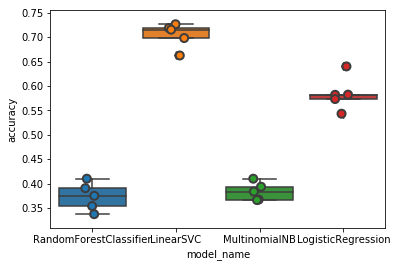

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [11]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.698044
LogisticRegression        0.578886
MultinomialNB             0.400558
RandomForestClassifier    0.364629
Name: accuracy, dtype: float64

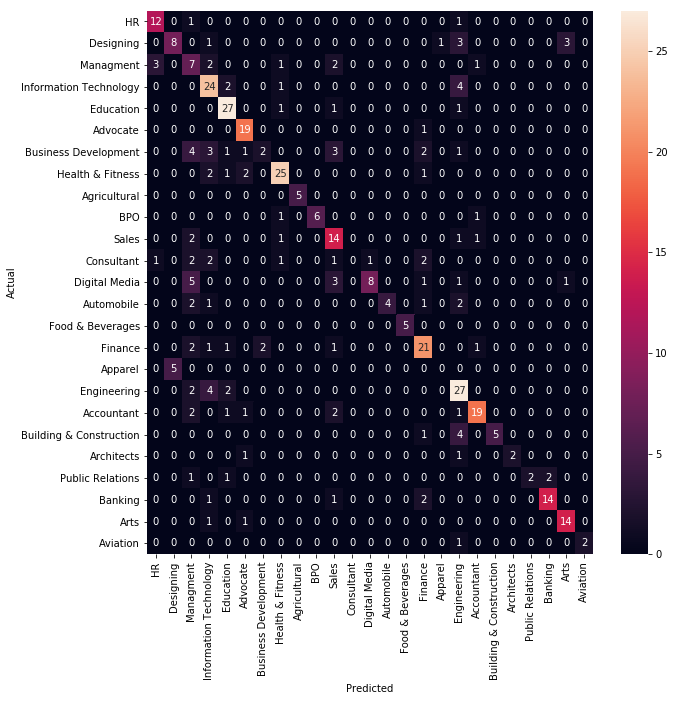

In [36]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [13]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Category'].unique()))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   precision    recall  f1-score   support

                                                                                                                                                                                                                                                                            

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 47, does not match size of target_names, 69
  .format(len(labels), len(target_names))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
